In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
!pip install scikit-learn==1.2.2

EDA

In [ ]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


<Axes: >

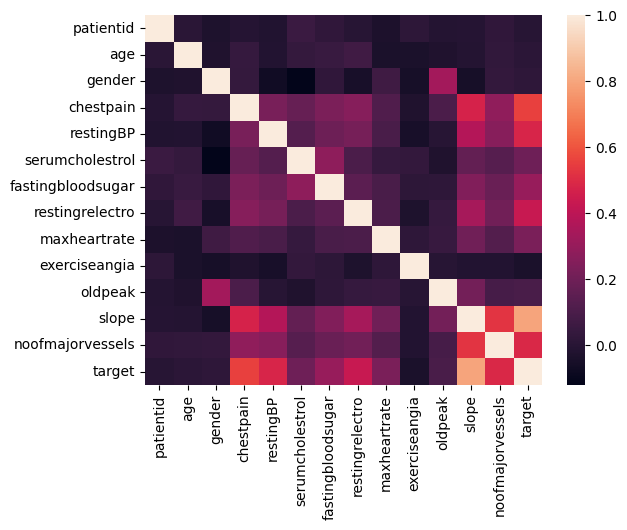

In [ ]:
sns.heatmap(df.corr())

Features of the dataset are chosen if their correlation with the column 'target' is greater than 0.5

In [ ]:
X = df.drop(['patientid','age','gender','serumcholestrol','fastingbloodsugar','maxheartrate','exerciseangia','oldpeak','target'],axis = 1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [ ]:
!pip install prettytable

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable
# scalar = StandardScaler().fit(X_train)
# x_train_transformed = scalar.transform(X_train)
# x_test_transformed = scalar.transform(X_test)
hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        svm = SVC(kernel=kernel, C=c)
        scores = cross_validate(svm, X_train, y_train, cv=10, scoring='accuracy')
        mean_score = np.mean(scores['test_score'])
        hyperparameter_score_list.append([kernel, c, mean_score])# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "Avg accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2],3)])
print(myTable)

+---------+-----+--------------+
|  Kernel |  C  | Avg accuracy |
+---------+-----+--------------+
|  linear | 0.5 |    0.933     |
|  linear | 1.0 |    0.934     |
|  linear | 1.5 |    0.934     |
|  linear | 2.0 |    0.936     |
|  linear | 2.5 |    0.936     |
|   poly  | 0.5 |    0.755     |
|   poly  | 1.0 |     0.76     |
|   poly  | 1.5 |    0.769     |
|   poly  | 2.0 |    0.781     |
|   poly  | 2.5 |    0.785     |
|   rbf   | 0.5 |    0.745     |
|   rbf   | 1.0 |    0.757     |
|   rbf   | 1.5 |     0.76     |
|   rbf   | 2.0 |    0.764     |
|   rbf   | 2.5 |    0.776     |
| sigmoid | 0.5 |    0.381     |
| sigmoid | 1.0 |    0.354     |
| sigmoid | 1.5 |    0.342     |
| sigmoid | 2.0 |     0.34     |
| sigmoid | 2.5 |    0.339     |
+---------+-----+--------------+


Hyper parameters (kernel, C) are chosen based on average accuracy.
C - Penalizing cost of model for misclassification

In [ ]:
svm = SVC(kernel='linear', C=2.5)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),2))
print("Precision:",round(precision_score(y_test,y_pred),2))
print("Recall:",round(recall_score(y_test,y_pred),2))

Accuracy: 0.96
Precision: 0.97
Recall: 0.96


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),2))
print("Precision:",round(precision_score(y_test,y_pred),2))
print("Recall:",round(recall_score(y_test,y_pred),2))

Accuracy: 0.97
Precision: 0.97
Recall: 0.97


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),2))
print("Precision:",round(precision_score(y_test,y_pred),2))
print("Recall:",round(recall_score(y_test,y_pred),2))

Accuracy: 0.96
Precision: 0.97
Recall: 0.96


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train.values, y_train.values)
y_pred = clf_gini.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),2))
print("Precision:",round(precision_score(y_test,y_pred),2))
print("Recall:",round(recall_score(y_test,y_pred),2))

Accuracy: 0.94
Precision: 0.96
Recall: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(X_train.values,y_train.values)
y_pred = classifier.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),2))
print("Precision:",round(precision_score(y_test,y_pred),2))
print("Recall:",round(recall_score(y_test,y_pred),2))

Accuracy: 0.91
Precision: 0.9
Recall: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Saving models

In [ ]:
import pickle

with open("SVM.pkl", 'wb') as file:
    pickle.dump(svm, file)

with open("NB.pkl", 'wb') as file:
    pickle.dump(gnb, file)

with open("LR.pkl", 'wb') as file:
    pickle.dump(logreg, file)

with open("Dtree.pkl", 'wb') as file:
    pickle.dump(clf_gini, file)

with open("KNN.pkl", 'wb') as file:
    pickle.dump(classifier, file)